### INF-510, 2016, Claudio Torres, ctorres@inf.utfsm.cl. DI-UTFSM

# Differentiation by Interpolation

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.sparse.linalg as sp
import sympy as sym
from scipy.linalg import toeplitz

Defining symbolic variables

In [9]:
xj, h, x = sym.symbols('xj h x', reals=True)
u1, u2, u3, u4, u5, u6, u7 = sym.symbols('u1 u2 u3 u4 u5 u6 u7', reals=True)


## Do you remember Lagrange interpolation? Please do

In [10]:
# The little Lagrange polynomials
def l_Lagrange(X,x,i):
    l=1
    n=len(X)
    for k in np.arange(i):
        l*=(x-X[k])
    for k in np.arange(i+1,n):
        l*=(x-X[k])
    return l
# The Lagrange polynomials
def L_Lagrange(X,x,i):
    num = l_Lagrange(X,x,i)
    den = l_Lagrange(X,X[i],i)
    L=num/den
    return L
# The Lagrange interpolation
def P_Lagrange(X,x,Y):
    P=0
    n=len(X)
    for i in np.arange(n):
        P+=Y[i]*L_Lagrange(X,x,i)
    return P

## Just a small example of a interpolation of 2 points

In [11]:
X=(0,1,2)
Y=(1,3,1)
P=P_Lagrange(X,x,Y)
print(P)

-3*x*(x - 2) + x*(x - 1)/2 + (x - 2)*(x - 1)/2


Plotting what we got

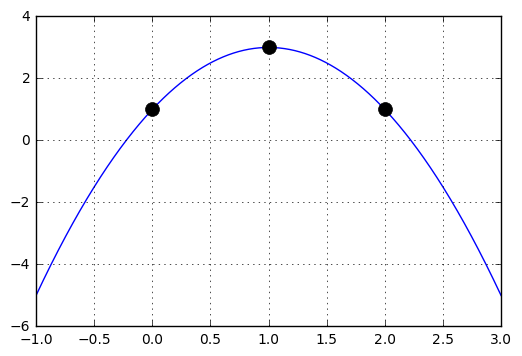

In [12]:
xx=np.linspace(min(X)-1,max(X)+1,1000)
Pl=sym.lambdify(x,P)
#Plv=np.vectorize(Pl)
plt.figure()
plt.plot(xx,Pl(xx))
plt.plot(np.array(X),np.array(Y),'k.',markersize=20)
plt.grid(True)
plt.ylim([np.min(Pl(xx))-1,np.max(Pl(xx))+1])
plt.show()

## Let's find the 4th order differentiation approximation

In [6]:
X=(xj-2*h,xj-h,xj,xj+h,xj+2*h)
Y=(u1,u2,u3,u4,u5)
P=P_Lagrange(X,x,Y)
print(P)

u1*(x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)/(24*h**4) - u2*(x - xj)*(-2*h + x - xj)*(-h + x - xj)*(2*h + x - xj)/(6*h**4) + u3*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)/(4*h**4) - u4*(x - xj)*(-2*h + x - xj)*(h + x - xj)*(2*h + x - xj)/(6*h**4) + u5*(x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)/(24*h**4)


In [7]:
Pp=sym.diff(P,x)
print(Pp)

u1*(x - xj)*(-2*h + x - xj)*(-h + x - xj)/(24*h**4) + u1*(x - xj)*(-2*h + x - xj)*(h + x - xj)/(24*h**4) + u1*(x - xj)*(-h + x - xj)*(h + x - xj)/(24*h**4) + u1*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)/(24*h**4) - u2*(x - xj)*(-2*h + x - xj)*(-h + x - xj)/(6*h**4) - u2*(x - xj)*(-2*h + x - xj)*(2*h + x - xj)/(6*h**4) - u2*(x - xj)*(-h + x - xj)*(2*h + x - xj)/(6*h**4) - u2*(-2*h + x - xj)*(-h + x - xj)*(2*h + x - xj)/(6*h**4) + u3*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)/(4*h**4) + u3*(-2*h + x - xj)*(-h + x - xj)*(2*h + x - xj)/(4*h**4) + u3*(-2*h + x - xj)*(h + x - xj)*(2*h + x - xj)/(4*h**4) + u3*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)/(4*h**4) - u4*(x - xj)*(-2*h + x - xj)*(h + x - xj)/(6*h**4) - u4*(x - xj)*(-2*h + x - xj)*(2*h + x - xj)/(6*h**4) - u4*(x - xj)*(h + x - xj)*(2*h + x - xj)/(6*h**4) - u4*(-2*h + x - xj)*(h + x - xj)*(2*h + x - xj)/(6*h**4) + u5*(x - xj)*(-h + x - xj)*(h + x - xj)/(24*h**4) + u5*(x - xj)*(-h + x - xj)*(2*h + x - xj)/(24*h**4) + u5*(x - xj)*(h + 

In [8]:
PpE=Pp.subs({x:xj})
print(PpE)

u1/(12*h) - 2*u2/(3*h) + 2*u4/(3*h) - u5/(12*h)


# Class work

## How to you find a 6th order approximation? Please do it

In [13]:
X=(xj-3*h, xj-2*h ,xj-h ,xj ,xj+h ,xj+2*h, xj+3*h)
Y=(u1, u2, u3, u4, u5, u6, u7)
P=P_Lagrange(X,x,Y)
print(P)

u1*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)/(720*h**6) - u2*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(3*h + x - xj)/(120*h**6) + u3*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(2*h + x - xj)*(3*h + x - xj)/(48*h**6) - u4*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)*(3*h + x - xj)/(36*h**6) + u5*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(h + x - xj)*(2*h + x - xj)*(3*h + x - xj)/(48*h**6) - u6*(x - xj)*(-3*h + x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)*(3*h + x - xj)/(120*h**6) + u7*(x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)*(3*h + x - xj)/(720*h**6)


In [14]:
Pp=sym.diff(P,x)
print(Pp)

u1*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)/(720*h**6) + u1*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(2*h + x - xj)/(720*h**6) + u1*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(h + x - xj)*(2*h + x - xj)/(720*h**6) + u1*(x - xj)*(-3*h + x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)/(720*h**6) + u1*(x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)/(720*h**6) + u1*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(2*h + x - xj)/(720*h**6) - u2*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)/(120*h**6) - u2*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(3*h + x - xj)/(120*h**6) - u2*(x - xj)*(-3*h + x - xj)*(-2*h + x - xj)*(h + x - xj)*(3*h + x - xj)/(120*h**6) - u2*(x - xj)*(-3*h + x - xj)*(-h + x - xj)*(h + x - xj)*(3*h + x - xj)/(120*h**6) - u2*(x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(3*h + x - xj)/(120*h**6) - u2*(-3*h + x - xj)*(-2*h + x - xj)*(-h + x - xj)*(h + x - xj)*(3*h +

In [15]:
PpE=Pp.subs({x:xj})
print(PpE)

-u1/(60*h) + 3*u2/(20*h) - 3*u3/(4*h) + 3*u5/(4*h) - 3*u6/(20*h) + u7/(60*h)


## How do you find a second order approximation on a left boundary? i.e. say you have $u_1(x_1)$, $u_2(x_2)$ and $u_3(x_3)$, interpolate them and compute the derivative at $x_1$.

In [16]:
X=(xj-h,xj,xj+h)
Y=(u1,u2,u3)
P=P_Lagrange(X,x,Y)
print(P)

u1*(x - xj)*(-h + x - xj)/(2*h**2) - u2*(-h + x - xj)*(h + x - xj)/h**2 + u3*(x - xj)*(h + x - xj)/(2*h**2)


In [17]:
Pp=sym.diff(P,x)
print(Pp)

u1*(x - xj)/(2*h**2) + u1*(-h + x - xj)/(2*h**2) - u2*(-h + x - xj)/h**2 - u2*(h + x - xj)/h**2 + u3*(x - xj)/(2*h**2) + u3*(h + x - xj)/(2*h**2)


In [19]:
PpE=Pp.subs({x:xj-h})
print(PpE)

-3*u1/(2*h) + 2*u2/h - u3/(2*h)


In [20]:
PpE=Pp.subs({x:xj})
print(PpE)

-u1/(2*h) + u3/(2*h)


In [21]:
PpE=Pp.subs({x:xj+h})
print(PpE)

u1/(2*h) - 2*u2/h + 3*u3/(2*h)
